### Student Information
Name: 李忠翰

Student ID: 109062595

GitHub ID: spencerlii

Kaggle name: CHUN-HAN LI

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

-----------------------------------------------------------------------------------------------------------------------------

First part

In [2]:
### Begin Assignment Here

import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

>>> Exercise 1 (Take home):
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

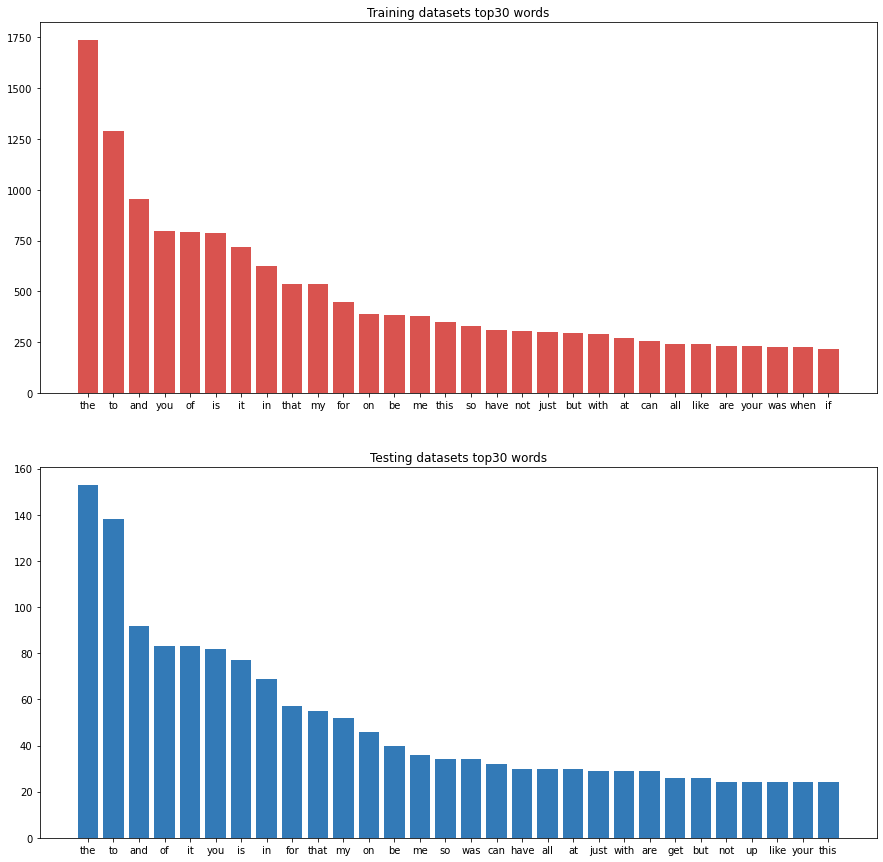

In [3]:
import numpy as np

X_text_train = train_df['text'].values
X_text_test = test_df['text'].values
X_text_mix = np.concatenate((X_text_train, X_text_test))

from sklearn.feature_extraction.text import CountVectorizer

cv_train = CountVectorizer()
count_train = cv_train.fit_transform(X_text_train)

cv_test = CountVectorizer()
count_test = cv_test.fit_transform(X_text_test)

cv_mix = CountVectorizer()
count_mix = cv_mix.fit_transform(X_text_mix)

tf_train = np.asarray(count_train.sum(axis=0))[0]
tf_test = np.asarray(count_test.sum(axis=0))[0]
tf_mix = np.asarray(count_mix.sum(axis=0))[0]

#Makes the list into pandas dataframe
dfTF_train = pd.DataFrame({'Terms' : cv_train.get_feature_names(), 'Freq'  : tf_train})
dfTF_train.sort_values(by=['Freq'], inplace=True, ascending=False)

dfTF_test = pd.DataFrame({'Terms' : cv_test.get_feature_names(), 'Freq'  : tf_test})
dfTF_test.sort_values(by=['Freq'], inplace=True, ascending=False)

dfTF_mix = pd.DataFrame({'Terms' : cv_mix.get_feature_names(), 'Freq'  : tf_mix})
dfTF_mix.sort_values(by=['Freq'], inplace=True, ascending=False)

from matplotlib import pyplot as plt

dfs = [dfTF_train, dfTF_test]
titles = ['Training datasets top30 words', 'Testing datasets top30 words']
color = ['#d9534f', '#337ab7']
Len = len(dfs)

plt.figure(figsize=(15,15))
for i in range(Len):
    x = dfs[i]['Terms'].values[:30].tolist()
    y = dfs[i]['Freq'].values[:30].tolist()

    plt.subplot(Len, 1, i + 1)
    plt.title(titles[i])
    plt.bar(x, y, color=color[i])
    
plt.show()

>>> Exercise 2 (Take home):
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
vectorizer1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
vectorizer1000.fit(train_df['text'])

train_data_tfidf_features_1000 = vectorizer1000.transform(train_df['text'])

# observe some feature names
feature_names_1000 = vectorizer1000.get_feature_names()
feature_names_1000[100:110]

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

>>> Exercise 3 (Take home): 
Can you interpret the results above? What do they mean?

training accuracy: 0.99 is very high, but testing accuracy: 0.64 is low. This is due to the overfitting problem, the decision tree memorized several key words makes the predition not good enough.

>>> Exercise 4 (Take home): 
Build a model using a Naive Bayes model and train it. What are the testing results?

In [11]:

# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Training Accuracy : 0.7913
Testing Accuracy a: 0.6974


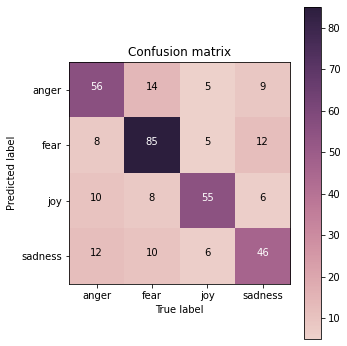

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

from sklearn.naive_bayes import MultinomialNB
NBmodel = MultinomialNB().fit(X_train, y_train)

y_pred_train = NBmodel.predict(X_train)
y_pred_test = NBmodel.predict(X_test)

from sklearn.metrics import accuracy_score
print("Training Accuracy : %.4f" %accuracy_score(y_pred_train, y_train))
print("Testing Accuracy a: %.4f" %accuracy_score(y_pred_test, y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test) 

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

>>> Exercise 5 (Take home): 
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

As I mentioned before, decision tree has the problem of overfitting. However, Naive Bayes classifier distinguishes labels base on probabilities. Because of that, the testing accuracy is higher that the result of decision tree. 

>>> Exercise 6 (Take home): 
Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [16]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras.callbacks import CSVLogger
csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))

## predict
pred_result = model.predict(X_test, batch_size=128)

pred_result = label_decode(label_encoder, pred_result)

from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 409     anger
2090      joy
2619      joy
676     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)
Epoch 1/25
113/113 [==============================] - 0s 2ms/step - loss: 1.3244 - accuracy: 0.3772 - val_loss: 1.2585 - val_accuracy: 0.5043
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9763 - accuracy: 0.6571 - val_loss: 0.9161 - val_accuracy: 0.6744
Epoch 3/25
113/113 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.8038 - val_loss: 0.7764 - val_accuracy: 0.6801
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8511 - val_loss: 0.7897 - val_accuracy: 0.6859
Epoch 5/25
113/113 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8846 - val_loss: 0.8172 

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.377249,1.324412,0.504323,1.258497
1,1,0.657072,0.976286,0.674352,0.916135
2,2,0.803764,0.569525,0.680115,0.776363
3,3,0.851093,0.411920,0.685879,0.789654
4,4,0.884583,0.325883,0.703170,0.817201
5,5,0.905619,0.270755,0.691643,0.868649
6,6,0.921395,0.227843,0.685879,0.908873
7,7,0.939109,0.189188,0.691643,0.942596
8,8,0.950180,0.165359,0.685879,1.009989
9,9,0.955992,0.148452,0.694524,1.066049


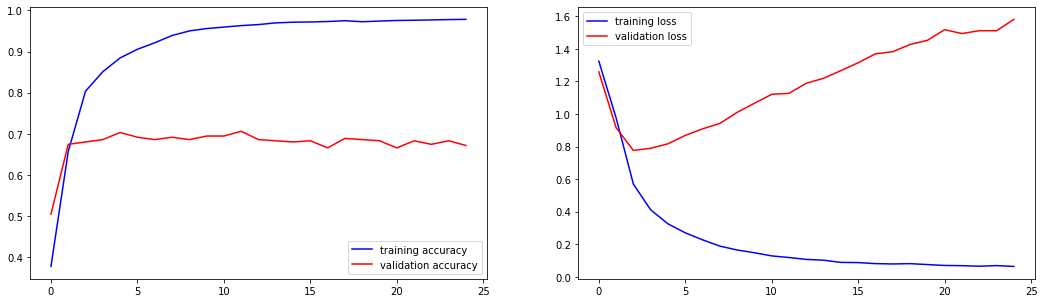

In [17]:
X_epoch = training_log['epoch'].values
X_acc_train = training_log['accuracy'].values
X_loss_train = training_log['loss'].values

X_acc_val = training_log['val_accuracy'].values
X_loss_val = training_log['val_loss'].values

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.plot(X_epoch, X_acc_train, color='b', label='training accuracy')
plt.plot(X_epoch, X_acc_val, color='r', label='validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(X_epoch, X_loss_train, color='b', label='training loss')
plt.plot(X_epoch, X_loss_val, color='r', label='validation loss')
plt.legend()

plt.show()

For the cases that are more than two or three epochs, the problem of overfitting can be observed. 

>>> Exercise 7 (Take home): 
Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

We can build a RNN(LSTM) model which excels in processing the sequence of data and set the input dimension equal to the size of a word vector.

>>> Exercise 8 (Take home): 
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [21]:
from gensim.models import KeyedVectors
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

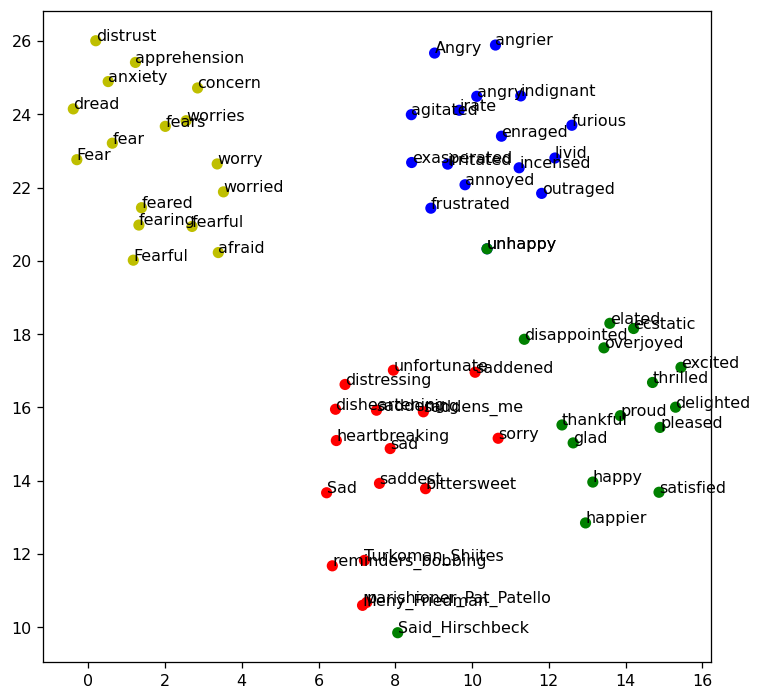

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---------------------------------------------------------------------------------------------------------------------

Second and third part please see Second and Third Part.ipynb, thank you~